In [1]:
# dimensionality reduction can
# 1.speed up training
# 2.data visualization( make densed images able to be ploted with less data)

# three popular ways to do dimensionality reduction
# 1. PCA
# 2. Kernal PCA
# 3. LLE

In [2]:
# two main approaches
# 1. projection
# 2.Manifold Learning

In [3]:
# projection
# delet an axis and plot datas on a plane(most of the time doesnt work beacause
# the fact that they can be twisted and folded)

In [4]:
# Manifold Learning
# empirically assume that a dataset can be folded into a lower-dimentioned one
# empirically assume that a lower-dimentioned fold will be simpler

In [5]:
from sklearn.datasets import make_swiss_roll

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

In [6]:
X

array([[-3.29677117,  4.26198454,  7.69787682],
       [ 5.95972743, 11.45784273, 12.72625276],
       [ 6.66051523, 18.15820401, -9.84713337],
       ...,
       [ 6.18364276,  1.44095323, -1.71242696],
       [ 5.86076169,  1.09185823, 12.47091112],
       [-8.16213703,  5.61235668,  4.51171684]])

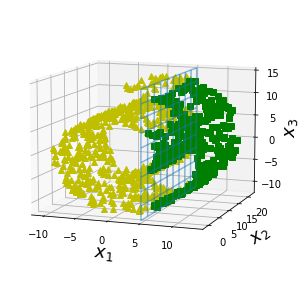

In [7]:
from matplotlib import gridspec
import numpy as np
import matplotlib.pyplot as plt
axes = [-11.5, 14, -2, 23, -12, 15]

x2s = np.linspace(axes[2], axes[3], 10)
x3s = np.linspace(axes[4], axes[5], 10)
x2, x3 = np.meshgrid(x2s, x3s)

fig = plt.figure(figsize=(6, 5))
ax = plt.subplot(111, projection='3d')

positive_class = X[:, 0] > 5
X_pos = X[positive_class]
X_neg = X[~positive_class]
ax.view_init(10, -70)
ax.plot(X_neg[:, 0], X_neg[:, 1], X_neg[:, 2], "y^")
ax.plot_wireframe(5, x2, x3, alpha=0.5)
ax.plot(X_pos[:, 0], X_pos[:, 1], X_pos[:, 2], "gs")
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()

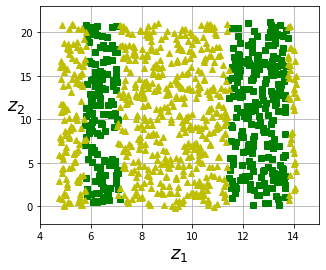

In [8]:
fig = plt.figure(figsize=(5, 4))
ax = plt.subplot(111)

plt.plot(t[positive_class], X[positive_class, 1], "gs")
plt.plot(t[~positive_class], X[~positive_class, 1], "y^")
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.show()

In [9]:
#X = np.array([[3, 6, 2],
            #  [7, 2, 9],
            #  [4, 8, 1]])
#positive_class = X[:, 0] > 5
#print(positive_class)
#X_pos = X[positive_class]
#print(X_pos)
#第一列で５以上の行を取り出す

In [10]:
# PCA (the most popular)
# finds the hyperplane that lies closest to the data and perform projection

# PCA → identifies the axis that accounts for the largest amount of variance in the
# training set

# np's svd can obtain all the principal components of the training set




import numpy as np
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]
# PCA requires the data to be centered at fitst
# (Scikit-Learn does this automatically)

In [11]:
# projection with the most variances can be performed by 
# projecting it onto the hyperplane defined by the first d principal components( to d dimensions)
W2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)

#P294-295

In [12]:
# Using Scikit-Learn
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

# n_components attribute holds the transpose of Wd, referring to the deimension
# on which we want to project

In [13]:
pca.explained_variance_ratio_
# 40.78% lies along the first PC
# 30.2 %lies along the second PC

array([0.40782396, 0.3020019 ])

In [14]:
# Chooing the Right number of Dimensions
# performs PCA without reducing dimensionality
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)


# try this with MNIST

pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) +1

In [15]:
d

154

In [16]:
# setting n_components= d and run PCA again is the next step
# better choice:

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)
                                       # setting n_components between 0 and 1
                                       # means setting the targeted accuracy
print(pca.n_components_)
print(np.sum(pca.explained_variance_ratio_))

154
0.9504054055424853


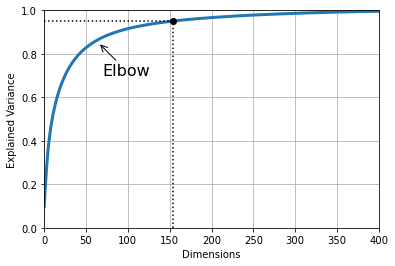

In [17]:
# another way is to plot the explained variance as a function of the number of dimensions
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)

plt.show()

In [18]:

from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

In [19]:
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [20]:
# 784 features are shorted to about 150
# this tremendously speed up a classification algorithm
# reconstruct the original data by PCA projected data loses some data(here, the 5% we lost)
# 'reconstruction error'
pca = PCA(n_components = 20)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

In [21]:
# EXTRA
import matplotlib as mpl
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

Text(0.5, 1.0, 'Compressed')

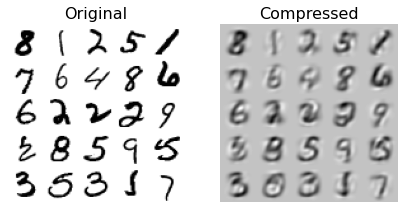

In [22]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)
# the equation of reconstruction is on P298

In [ ]:
# Randomized PCA
# svd_solver="randomized" → stochastic algorithm "Randomized PCA" will be used
# faster
# this is automatically chosen, but  svd_solver="full" uses full SVD approach
rnd_pca = PCA(n_components = 154, svd_solver="randomized")
X_reduced = rnd_pca.fit_transform(X_train)

In [ ]:
# Incremental PCA
# useful for large training set for applying PCA online
# uses mini-batches to split training set and feed to IPCA
from sklearn.decomposition import IncrementalPCA
n_batches = 100
inc_pca = IncrementalPCA(n_components=154)

# np.array_split(X, n)はXをn分割する

for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)
X_reduced = inc_pca.transform(X_train)

In [ ]:
# another way is on p300

In [ ]:
# Kernel PCA
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

In [ ]:
from sklearn.decomposition import KernelPCA

lin_pca = KernelPCA(n_components = 2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

y = t > 6.9

plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "Linear kernel"), (132, rbf_pca, "RBF kernel, $\gamma=0.04$"), (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(X)
    if subplot == 132:
        X_reduced_rbf = X_reduced
    
    plt.subplot(subplot)
    #plt.plot(X_reduced[y, 0], X_reduced[y, 1], "gs")
    #plt.plot(X_reduced[~y, 0], X_reduced[~y, 1], "y^")
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

plt.show()
# different Swiss roll to be reduced to 2-D using different kernel

In [ ]:
# use grid search to choose the best kernel
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
clf = Pipeline([("kpca", KernelPCA(n_components=2)),
                ("log_reg", LogisticRegression())
               ])
param_grid = [{"kpca__gamma":np.linspace(0.03, 0.05, 10),
               "kpca__kernel": ["rbf", "sigmoid"]# use kpca__ +name to specify kpca
               }]                                # to GridSearh
grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X,y)

In [ ]:
print(grid_search.best_params_)

In [ ]:
# another way is to recontruct and measure, minimize the erro between the original
# image
# fit_inverse_transform = True can do this
rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.0433,
                    fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(X, X_preimage)

In [ ]:
def custom_scoring(estimator, X):
    X_inverse = estimator.inverse_transform(estimator.transform(X))
    mse = mean_squared_error(X, X_inverse)
    return -mse
# use -mse to find the minimum ( because scoring finds the largest)
rbf_pca = KernelPCA(n_components=2, gamma=0.0433,fit_inverse_transform=True)
param_grid_inv = {"kernel": ["rbf","sigmoid","poly","cosine","linear" ]}

grid_search_inv = GridSearchCV(rbf_pca, param_grid_inv, cv=3, scoring=custom_scoring)
grid_search_inv.fit(X)

In [ ]:
best_kernel = grid_search_inv.best_params_
best_kernel
# poly seems to be the best kernel here

In [ ]:
# LLE
# dont rely on projections
# 1. measure how each training instance linearly relates to its closest neighbors
# 2. look for a low-dimensional representation of the training set where these local
#    relationships are best preserved

# merit: good at unrolling twisted manifolds

In [23]:
from sklearn.manifold import LocallyLinearEmbedding

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_reduced = lle.fit_transform(X)

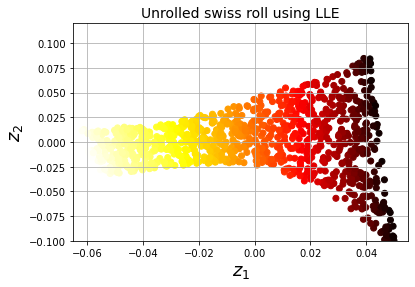

In [24]:
# Other Dimensionality Reduction Techniques
# P 307
plt.title("Unrolled swiss roll using LLE", fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)

plt.show()